In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv(r'csv/Social_Network_Ads.csv')
df

,Age,Gender,EstimatedSalary,Purchased
0,18,Female,15000,0
1,19,Male,18000,0
2,20,Female,20000,0
3,21,Male,22000,0
4,22,Female,24000,0
...,...,...,...,...
161,62,Female,108000,1
162,63,Male,110000,1
163,64,Female,112000,1
164,65,Male,114000,1


In [4]:
from sklearn.model_selection import train_test_split

X_train,x_test,Y_train,y_test= train_test_split(
df.drop(['Gender','Purchased'],axis=1),
df['Purchased'],test_size=0.3,random_state=0
)

In [5]:
print(X_train.shape,x_test.shape)
print(Y_train.shape,y_test.shape)


(116, 2) (50, 2)
(116,) (50,)


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) # here it will return the numpy array so we should have to again convert to the dataframe
x_test.scaled = scaler.transform(x_test)

C:\Users\Manichandu\AppData\Local\Temp\ipykernel_27152\2579494792.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  x_test.scaled = scaler.transform(x_test)


In [7]:
X_train_scaled = pd.DataFrame(scaler.transform(X_train),columns = X_train.columns)
x_test.scaled = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)


In [8]:
X_train_scaled.describe()

,Age,EstimatedSalary
count,1.160000e+02,1.160000e+02
mean,1.531342e-17,5.933951e-17
std,1.004338e+00,1.004338e+00
min,-1.818210e+00,-1.961551e+00
25%,-8.797790e-01,-8.579282e-01
50%,1.955065e-02,3.271477e-02
75%,8.602284e-01,8.362296e-01
max,1.935514e+00,1.949533e+00


In [9]:
X_train.describe()

,Age,EstimatedSalary
count,116.000000,116.000000
mean,41.250000,65655.172414
std,12.842778,25936.076418
min,18.000000,15000.000000
25%,30.000000,43500.000000
50%,41.500000,66500.000000
75%,52.250000,87250.000000
max,66.000000,116000.000000


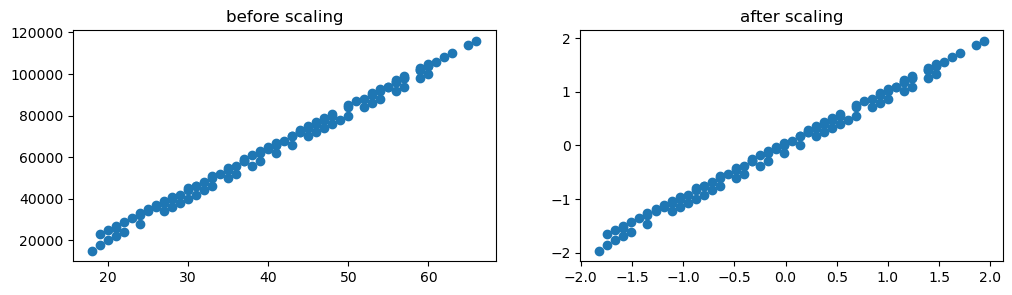

In [10]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (12,3))
ax1.set_title('before scaling')
ax1.scatter(x = X_train['Age'],y = X_train['EstimatedSalary']) 


ax2.set_title('after scaling')
ax2.scatter(x = X_train_scaled['Age'],y = X_train_scaled['EstimatedSalary']) 






<Axes: xlabel='Age', ylabel='Density'>

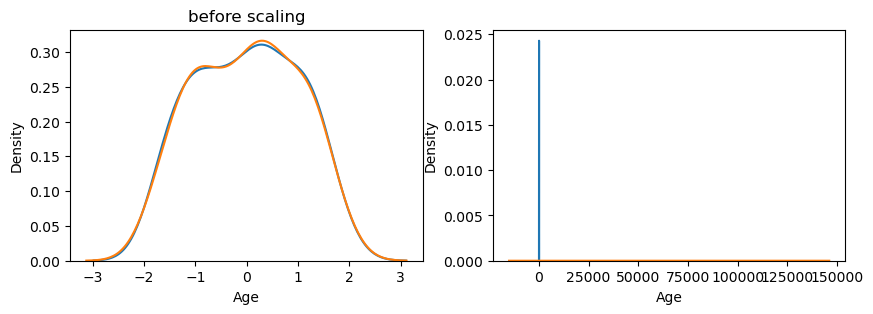

In [11]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize = (10,3))
ax1.set_title("after scaling")
sns.kdeplot(X_train_scaled['Age'],ax = ax1)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax1)

ax1.set_title("before scaling")
sns.kdeplot(X_train['Age'],ax = ax2)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax2)



In [12]:
from sklearn.linear_model import LogisticRegression

In [13]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [14]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [15]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(X_train_scaled)


In [16]:
from sklearn.metrics import accuracy_score

actual 1.0


ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets